# Nombre: DAVID ISRAEL LEON GALLARDO
                           Materia: Sistemas Expertos
## Caso práctico de implementación de un sistema de razonamiento


► Como caso práctico se implementará un sistema CBR básico para determinar la calidad del vino rojo.
► Para ello, se trabajará con el corpus Wine Quality Data Set.
► El corpus se compone de un total de 1599 muestras de vino rojo que contienen información de pruebas fisicoquímicas realizadas en
vinos rojos.
► La información detallada del corpus y las técnicas que aplicaron los autores se puede encontrar en el siguiente enlace:
https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub


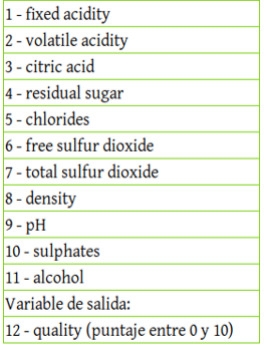

In [4]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
import operator

In [6]:

raiz = Tk()
def analizar():
    newWindows = Tk()
    newWindows.title("Tabla de calidad de vinos")
    df = pd.read_csv(r"winequality-red.csv",sep=';')
    lista = [list(row) for row in df.values]
    similares = {}

    cn = [float(tfa.get()), float(tva.get()), float(tca.get()), float(trs.get()), float(tc.get()), float(tfsd.get()),
          float(ttsd.get()), float(td.get()), float(tph.get()), float(ts.get()), float(ta.get())]
    mini = [4.6, 0.12, 0, 0.9, 0.012, 1, 6, 0.99, 2.74, 0.33, 8.4]
    maxi = [15.9, 1.58, 1.0, 13.9, 0.611, 72.0, 289.0, 1.0, 4.01, 2.0, 14.9]
    weight = [float(ctfa.get()), float(ctva.get()), float(ctca.get()), float(ctrs.get()), float(ctc.get()),
              float(ctfsd.get()),
              float(cttsd.get()), float(ctd.get()), float(ctph.get()), float(cts.get()), float(cta.get())]

    def similarity(ce):
        valor = 0
        for i in range(len(mini)):
            valor += weight[i] * (1 - ((abs(ce[i] - cn[i])) / (maxi[i] - mini[i])))
        return valor / sum(weight)

    for i in range(len(lista)):
        fila = []
        fila = lista[i]
        x = similarity(fila)
        similares.update({str(i): round(x, 3)})

    ordenados = dict(sorted(similares.items(), key=operator.itemgetter(1)))
    cols = (
    "#Wine", "Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar", "Chlorides", "Free Sulfure Dioxide",
    "Total Sulfure Dioxide", "Density", "pH", "Sulphates", "Alcohol", "Quality", "Similarity")
    tree = ttk.Treeview(newWindows, columns=cols, show='headings')
    vsb = ttk.Scrollbar(newWindows, orient="vertical", command=tree.yview)
    vsb.pack(side=RIGHT, fill=BOTH)

    tree.configure(yscrollcommand=vsb.set)
    for i in range(len(cols)):
        tree.heading(cols[i], text=cols[i])
        tree.column(cols[i], minwidth=0, width=50)
    tree.pack(expand=YES, fill=BOTH)
    tam = len(ordenados)
    for i in range(tam):
        pos = int(list(ordenados.items())[i][0])
        c1 = lista[int(pos)][0]
        c2 = lista[int(pos)][1]
        c3 = lista[int(pos)][2]
        c4 = lista[int(pos)][3]
        c5 = lista[int(pos)][4]
        c6 = lista[int(pos)][5]
        c7 = lista[int(pos)][6]
        c8 = lista[int(pos)][7]
        c9 = lista[int(pos)][8]
        c10 = lista[int(pos)][9]
        c11 = lista[int(pos)][10]
        c12 = lista[int(pos)][11]
        sim = str(list(ordenados.items())[i][1])
        tree.insert("", 0, i, values=(str(pos), c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, sim))

    # print("Item Mas Similar")
    fpos = list(ordenados.items())[tam - 1][0]
    fval = list(ordenados.items())[tam - 1][1]
    res = lista[int(fpos)][11]
    messagebox.showinfo(message="Calidad= " + str(res))


lista = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

raiz.geometry('600x270')  # anchura x altura

raiz.title('Calidad de vinos')

Label(raiz, text="Analisis de calidad de vino").place(x=200, y=0)

Label(raiz, text="Fixed Acidy").place(x=0, y=25)
tfa = Spinbox(raiz, from_=0.0, to=15.9, width=5, increment=0.1)
tfa.place(x=150, y=25)
ctfa = ttk.Combobox(raiz, values=lista, width=5)
ctfa.place(x=225, y=25)
ctfa.current(3)

Label(raiz, text="Volatily Acidy").place(x=308, y=25)
tva = Spinbox(raiz, from_=0.0, to=1.58, width=5, increment=0.01)
tva.place(x=450, y=25)
ctva = ttk.Combobox(raiz, values=lista, width=5)
ctva.place(x=525, y=25)
ctva.current(3)

Label(raiz, text="Citric Acid").place(x=0, y=50)
tca = Spinbox(raiz, from_=0.0, to=1.0, width=5, increment=0.1)
tca.place(x=150, y=50)
ctca = ttk.Combobox(raiz, values=lista, width=5)
ctca.place(x=225, y=50)
ctca.current(3)

Label(raiz, text="Residual Sugar").place(x=308, y=50)
trs = Spinbox(raiz, from_=0.0, to=13.9, width=5, increment=0.1)
trs.place(x=450, y=50)
ctrs = ttk.Combobox(raiz, values=lista, width=5)
ctrs.place(x=525, y=50)
ctrs.current(5)

Label(raiz, text="Chlorides").place(x=0, y=75)
tc = Spinbox(raiz, from_=0.0, to=0.611, width=5, increment=0.001)
tc.place(x=150, y=75)
ctc = ttk.Combobox(raiz, values=lista, width=5)
ctc.place(x=225, y=75)
ctc.current(1)

Label(raiz, text="Free Sulfur Dioxide").place(x=308, y=75)
tfsd = Spinbox(raiz, from_=0.0, to=72.0, width=5, increment=1.0)
tfsd.place(x=450, y=75)
ctfsd = ttk.Combobox(raiz, values=lista, width=5)
ctfsd.place(x=525, y=75)
ctfsd.current(1)

Label(raiz, text="Total Sulfure Dioxide").place(x=0, y=100)
ttsd = Spinbox(raiz, from_=0.0, to=289.0, width=5, increment=1)
ttsd.place(x=150, y=100)
cttsd = ttk.Combobox(raiz, values=lista, width=5)
cttsd.place(x=225, y=100)
cttsd.current(1)

Label(raiz, text="Density").place(x=308, y=100)
td = Spinbox(raiz, from_=0.0, to=1.0000, width=6, increment=0.0001)
td.place(x=450, y=100)
ctd = ttk.Combobox(raiz, values=lista, width=5)
ctd.place(x=525, y=100)
ctd.current(1)

Label(raiz, text="pH").place(x=0, y=125)
tph = Spinbox(raiz, from_=0.0, to=4.01, width=5, increment=0.01)
tph.place(x=150, y=125)
ctph = ttk.Combobox(raiz, values=lista, width=5)
ctph.place(x=225, y=125)
ctph.current(6)

Label(raiz, text="Sulphates").place(x=308, y=125)
ts = Spinbox(raiz, from_=0.0, to=2.0, width=5, increment=0.01)
ts.place(x=450, y=125)
cts = ttk.Combobox(raiz, values=lista, width=5)
cts.place(x=525, y=125)
cts.current(1)

Label(raiz, text="Alcohol").place(x=0, y=150)
ta = Spinbox(raiz, from_=0.0, to=14.9, width=5, increment=0.1)
ta.place(x=150, y=150)
cta = ttk.Combobox(raiz, values=lista, width=5)
cta.place(x=225, y=150)
cta.current(5)

ttk.Button(raiz, text='Calcular', command=analizar).place(x=275, y=200)
raiz.mainloop()

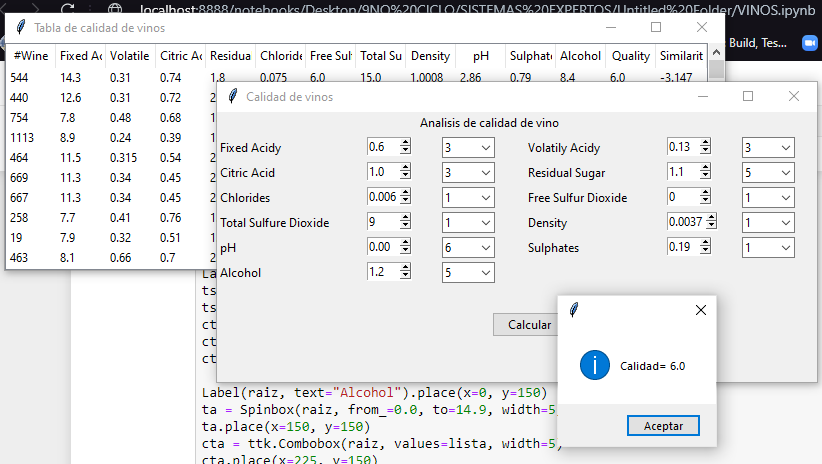